# 060524 SI Figures

In [44]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import re
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ast
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import norm
import scipy.stats as stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from tqdm import tqdm
from pathlib import Path
from glob import glob
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

import Lorentzian

# Figure S1

In [2]:
# plot UV_vis spectra
p_data = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA/datasets")
uvvis_data = pd.read_csv(Path(p_data, 'uvvis_AuNR25x85.csv'))
TEM_data = pd.read_csv(Path(p_data, 'tem_AuNR25x85.csv'))

Text(0, 0.5, 'Absorbance (a. u.)')

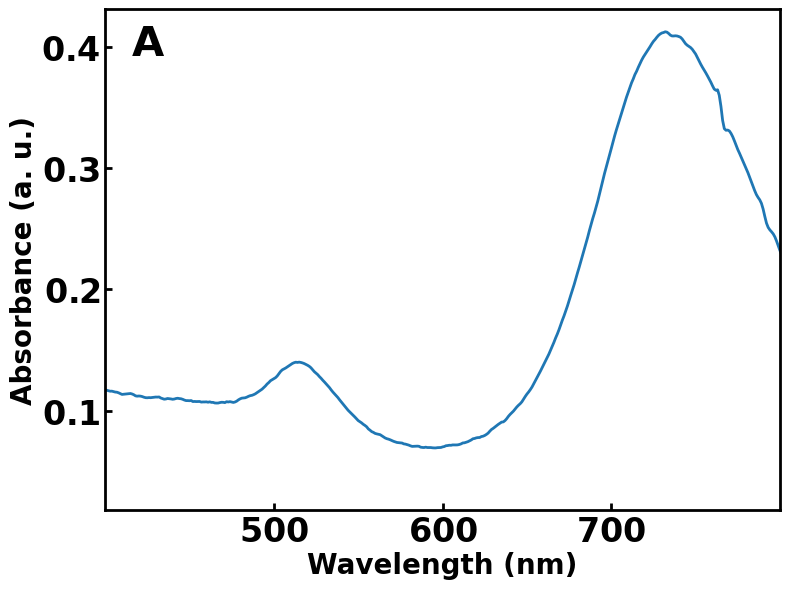

In [3]:
fig, ax = plt.subplots()
ax.plot(uvvis_data['wav'], uvvis_data['absorbance'], lw=2)
ax.text(0.04, 0.97, 'A', ha='left', va='top', transform=ax.transAxes, fontsize=30)
ax.set_xlim(400, 800)
ax.set_xticks([500, 600, 700])
# ax.set_yticks([0, 0.05, 0.1, 0.15])
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance (a. u.)')

# ax.vlines(733, 0, 0.5, color='b', ls='--', lw=1)
# plt.savefig("ITO_FigureS1A.svg", format="svg", dpi=300)

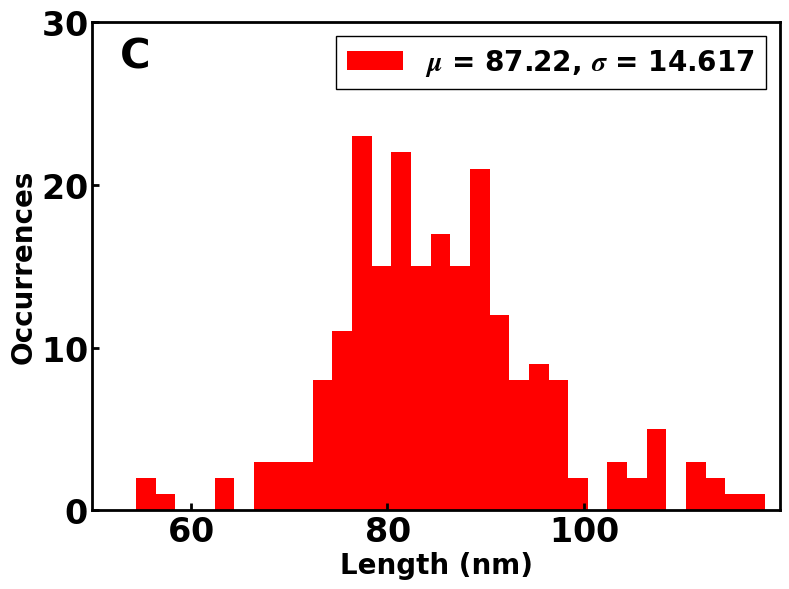

In [4]:
width = TEM_data['Minor']
length = TEM_data['Major']

fig, ax = plt.subplots()
binwidth = 2
# target = glass_exp_data['eres']
target = length
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='r', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.vlines(0, 0, 35, color='k', ls='--', lw=2)
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)
ax.text(0.04, 0.97, 'C', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Length (nm)')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 30)
ax.set_xlim(50, 120)

ax.set_xticks([60, 80, 100])
ax.set_yticks([0, 10, 20, 30])

ax.legend(fontsize=20)

# plt.savefig("ITO_FigureS1C.svg", format="svg", dpi=300)

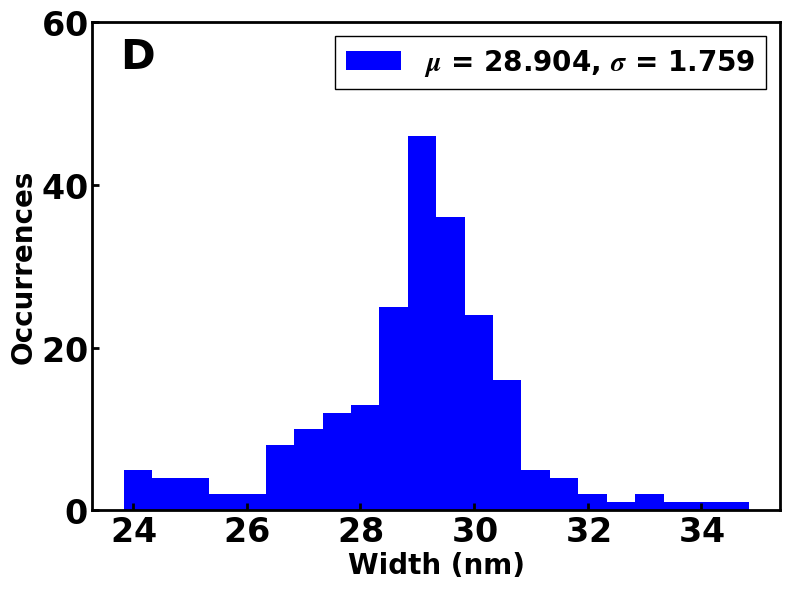

In [5]:
fig, ax = plt.subplots()
binwidth = 0.5
target = width
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='b', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.vlines(0, 0, 35, color='k', ls='--', lw=2)
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)
ax.text(0.04, 0.97, 'D', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Width (nm)')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 60)
# ax.set_xlim(0.8, 1.2)

ax.set_xticks([24, 26, 28, 30, 32, 34])
ax.set_yticks([0, 20, 40, 60])

ax.legend(fontsize=20)

# plt.savefig("ITO_FigureS1D.svg", format="svg", dpi=300)

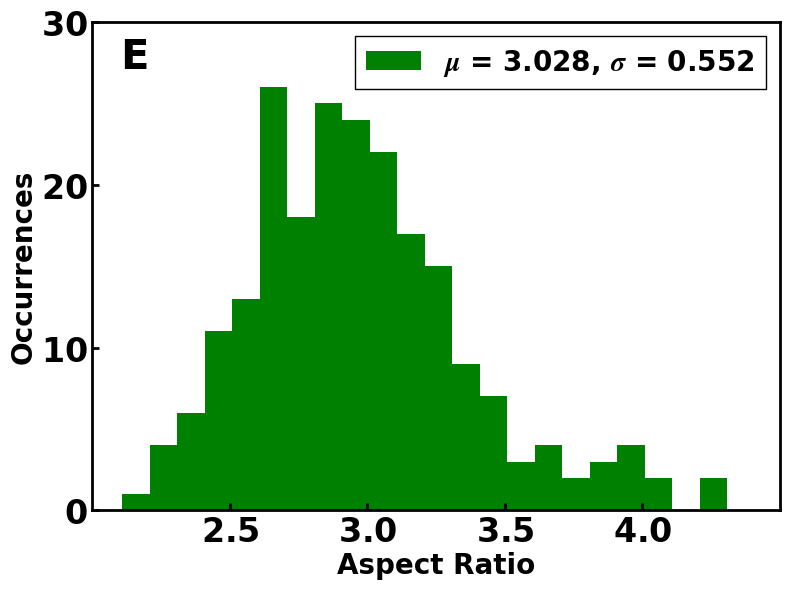

In [6]:
fig, ax = plt.subplots()
binwidth = 0.1
# target = glass_exp_data['eres']
target = length/width
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='g', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.vlines(0, 0, 35, color='k', ls='--', lw=2)
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)
ax.text(0.04, 0.97, 'E', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Aspect Ratio')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 30)
ax.set_xlim(2, 4.5)

ax.set_xticks([2.5, 3.0, 3.5, 4.0])
ax.set_yticks([0, 10, 20, 30])

ax.legend(fontsize=20)

# plt.savefig("ITO_FigureS1E.svg", format="svg", dpi=300)

# Figure S1-2

In [63]:
# plot UV_vis spectra
p_data = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA/datasets")
uvvis_data = pd.read_csv(Path(p_data, 'zubarev_rod_synthesis_uvvis.csv'))
TEM_data = pd.read_csv(Path(p_data, 'zubarev_rods_sizes_raw.csv'))
TEM_data['ratio'] = TEM_data['length'] / TEM_data['width'] 

Text(0, 0.5, 'Absorbance (a. u.)')

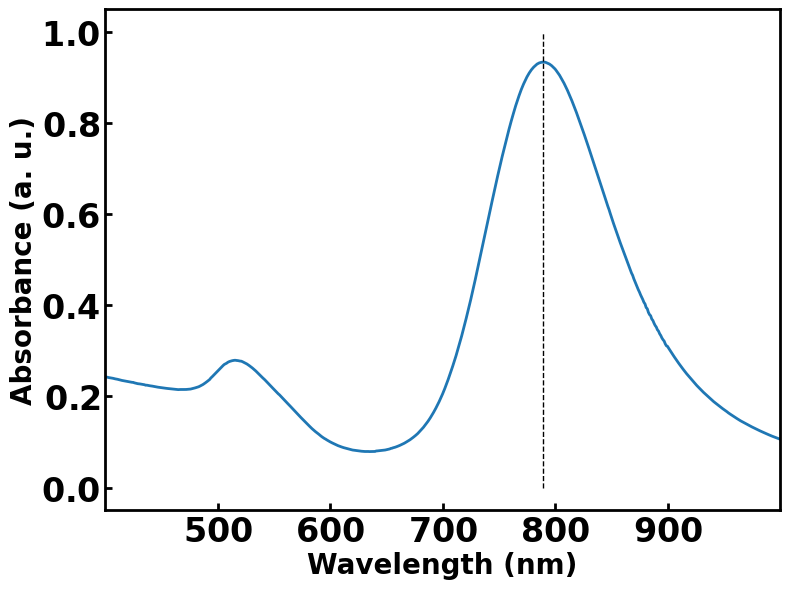

In [87]:
fig, ax = plt.subplots()
ax.plot(uvvis_data['wav'], uvvis_data['absorbance'], lw=2)
ax.vlines(789, 0, 1, ls='--', lw=1, color='k')
# ax.text(0.04, 0.97, 'A', ha='left', va='top', transform=ax.transAxes, fontsize=30)
ax.set_xlim(400, 1000)
ax.set_xticks([500, 600, 700, 800, 900])

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance (a. u.)')

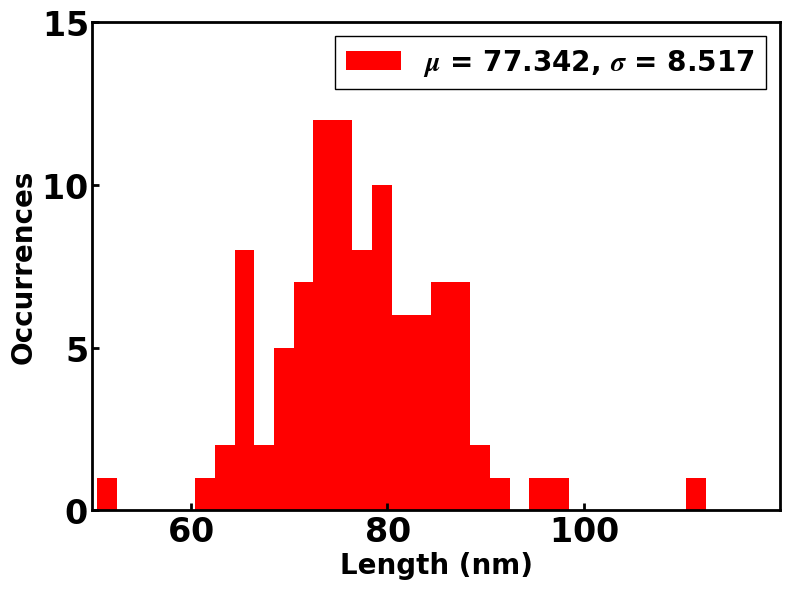

In [88]:
width = TEM_data['width']
length = TEM_data['length']

fig, ax = plt.subplots()
binwidth = 2
target = length
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='r', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.text(0.04, 0.97, 'C', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Length (nm)')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 15)
ax.set_xlim(50, 120)
ax.set_xticks([60, 80, 100])
ax.set_yticks([0, 5, 10, 15])

ax.legend(fontsize=20)

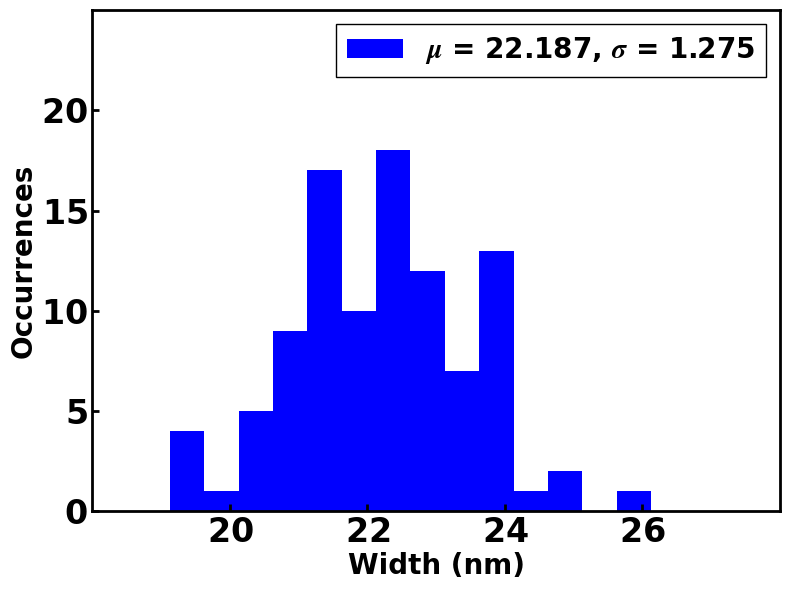

In [89]:
fig, ax = plt.subplots()
binwidth = 0.5
target = width
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='b', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.text(0.04, 0.97, 'D', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Width (nm)')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 25)
ax.set_xlim(18, 28)
ax.set_xticks([20, 22, 24, 26])
ax.set_yticks([0, 5, 10, 15, 20])

ax.legend(fontsize=20)

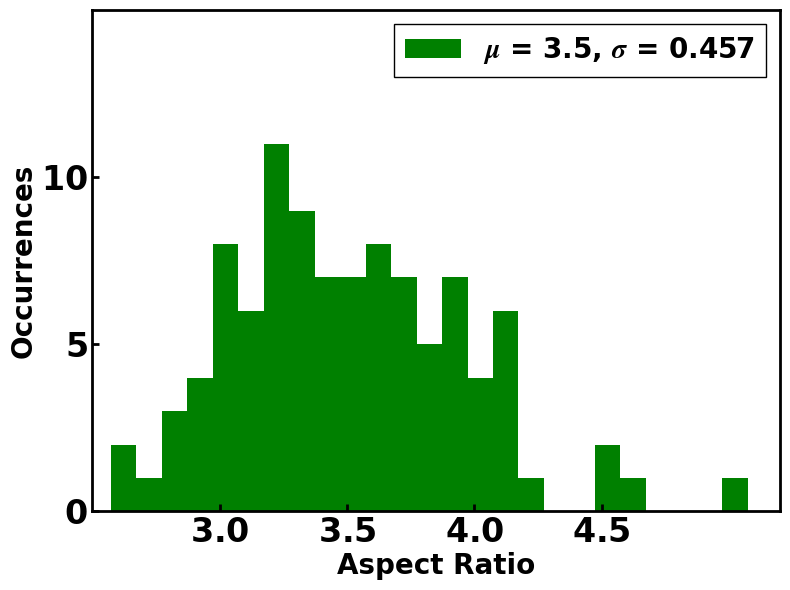

In [91]:
fig, ax = plt.subplots()
binwidth = 0.1
target = length/width
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='g', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.text(0.04, 0.97, 'E', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Aspect Ratio')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 15)
ax.set_xlim(2.5, 5.2)
ax.set_xticks([3.0, 3.5, 4.0, 4.5])
ax.set_yticks([0, 5, 10])

ax.legend(fontsize=20)

# Figure S2

In [7]:
# define testing data from actual experiments
exp_glass_data = pd.read_csv(Path(p_data, '100323_ZJ_exp_glass_final.csv'))
exp_ito_data = pd.read_csv(Path(p_data, '100323_ZJ_exp_ito_final.csv'))
exp_ito_data = exp_ito_data.drop(47)
exp_ito_data = exp_ito_data.reset_index(drop=True)

# particles on glass outliers particles 47, 67, 71
outliers_particles = [47, 67, 71]
exp_glass_data = exp_glass_data.drop(outliers_particles)
exp_glass_data.reset_index(drop=True, inplace=True)
print(exp_glass_data.shape)


(129, 11)


In [9]:
ECI = pd.read_csv(Path(p_data, 'ECI_ITO.csv'))
glass = pd.read_csv(Path(p_data, '100623_ECI_ITO_glass.csv'))

print(ECI[(ECI['Wavelength'] > 400) & (ECI['Wavelength'] < 1000)]['n'].mean())
print(ECI[(ECI['Wavelength'] > 400) & (ECI['Wavelength'] < 1000)]['k'].mean())

ECI['eV'] = 1240 / ECI['Wavelength']
glass['eV'] = 1240 / glass['Wavelength']
ECI.head()

1.9841242440944882
0.006554380577427821


,Wavelength,n,k,eV
0,193.787445,2.176239,0.681645,6.398763
1,195.369293,2.177690,0.669472,6.346954
2,196.951202,2.178717,0.657821,6.295976
3,198.533112,2.179358,0.646697,6.245810
4,200.115082,2.179650,0.636106,6.196435


In [11]:
tio2_data = pd.read_csv(Path(p_data, 'tio2.csv'))
al2o3_data = pd.read_csv(Path(p_data, 'al2o3.csv'))

tio2_data['eV'] = 1240 / tio2_data['wav']
al2o3_data['wav'] = al2o3_data['wav']*10e2
al2o3_data['eV'] = 1240 / al2o3_data['wav']

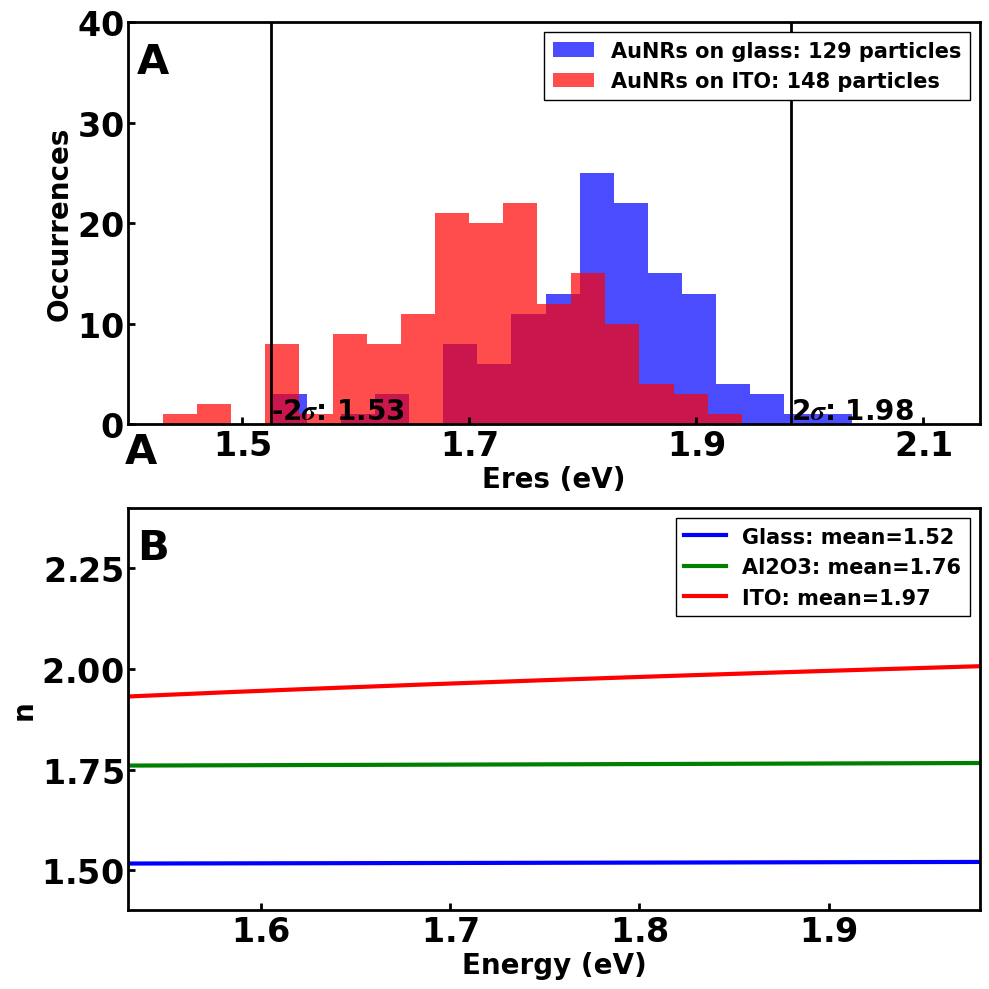

In [43]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(10, 10))

binwidth = 0.03
target = exp_glass_data['eres']
target_avg = target.mean()
target_std = target.std()

# ax1.vlines(target_avg, 0, ylim, color='k', ls='--', lw=2)
ax1.vlines(target_std*2 + target_avg, 0, ylim, color='k', ls='-', lw=2)
# ax1.vlines(-target_std*2 + target_avg, 0, ylim, color='k', ls='-', lw=2)

ax1.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), color='blue', alpha=0.7, label=f'AuNRs on glass: {len(target)} particles')

target2 = exp_ito_data['eres']
target2_avg = target2.mean()
target2_std = target2.std()

ylim = 40
# ax1.vlines(target2_avg, 0, ylim, color='k', ls='--', lw=2)
# ax1.vlines(target2_std*2 + target2_avg, 0, ylim, color='k', ls='-', lw=2)
ax1.vlines(-target2_std*2 + target2_avg, 0, ylim, color='k', ls='-', lw=2)

ax1.hist(target2, bins=np.arange(min(target2), max(target2)+binwidth, binwidth), color='red', alpha=0.7, label=f'AuNRs on ITO: {len(target2)} particles')

ax1.text(-target2_std*2 + target2_avg, 0.5, f'-2$\sigma$: {round(-target2_std*2 + target2_avg, 2)}', fontsize=20)
ax1.text(target_std*2 + target_avg, 0.5, f'2$\sigma$: {round(target_std*2 + target_avg, 2)}', fontsize=20)
# ax1.text(target_avg, 0.5, f'$\mu$: {round(target_avg, 2)}', fontsize=20)

ax1.text(0.04, 0.97, 'A', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax1.set_xlabel('Eres (eV)')
ax1.set_ylabel('Occurrences')
ax1.set_ylim(0, ylim)
ax1.set_xlim(1.4, 2.15)
ax1.set_xticks([1.5, 1.7, 1.9, 2.1])
ax1.legend(fontsize=20)
ax1.legend(loc='upper right', fontsize=15)
ax1.text(0.01, 0.95, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

ene_low = round(-target2_std*2 + target2_avg, 2)
ene_high = round(target_std*2 + target_avg, 2)

ECI_ITO_nmean = ECI[(ECI['eV'] > ene_low) & (ECI['eV'] < ene_high)]['n'].mean()
glass_ITO_nmean = glass[(glass['eV'] > ene_low) & (glass['eV'] < ene_high)]['n'].mean()

ax2.plot(glass['eV'], glass['n'], c='b', label=f"Glass: mean={round(glass_ITO_nmean, 2)}")
ax2.plot(al2o3_data["eV"], al2o3_data["n"], c='g', label=f"Al2O3: mean={round(al2o3_nmean, 2)}")
ax2.plot(ECI['eV'], ECI['n'], c='r', label=f"ITO: mean={round(ECI_ITO_nmean, 2)}")
# ax2.plot(tio2_data["eV"], tio2_data["n"], c='orange', label=f"TiO2: mean={round(tio2_nmean, 2)}")

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel("n")
ax2.set_xlim(ene_low, ene_high)
ax2.set_xticks([1.6, 1.7, 1.8, 1.9])
ax2.set_yticks([1.5, 1.75, 2.0, 2.25])
ax2.set_ylim(1.4, 2.4)
ax2.legend(loc='upper right', fontsize=15)
ax2.text(0.01, 0.95, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)  # Remove the space between plots